# Libraries and Data

In [25]:
# Import Libraries
import numpy as np
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.plot import plot_cross_validation_metric
from prophet.utilities import regressor_coefficients

In [31]:
# Load Data
df = pd.read_csv('lettuce_dataset.csv',encoding='ISO-8859-1')
df.head()

,Plant_ID,Date,Temperature (°C),Humidity (%),TDS Value (ppm),pH Level,Growth Days
0,1,8/3/2023,33.4,53,582,6.4,1
1,1,8/4/2023,33.5,53,451,6.1,2
2,1,8/5/2023,33.4,59,678,6.4,3
3,1,8/6/2023,33.4,68,420,6.4,4
4,1,8/7/2023,33.4,74,637,6.5,5


In [32]:
df = df.drop(columns=['Plant_ID'])

In [33]:
df['DATE'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df.index = df['DATE']
df.head()

,Date,Temperature (°C),Humidity (%),TDS Value (ppm),pH Level,Growth Days,DATE
DATE,,,,,,,
2023-08-03,8/3/2023,33.4,53,582,6.4,1,2023-08-03
2023-08-04,8/4/2023,33.5,53,451,6.1,2,2023-08-04
2023-08-05,8/5/2023,33.4,59,678,6.4,3,2023-08-05
2023-08-06,8/6/2023,33.4,68,420,6.4,4,2023-08-06
2023-08-07,8/7/2023,33.4,74,637,6.5,5,2023-08-07


In [34]:
df.drop(columns=['Date'])

,Temperature (°C),Humidity (%),TDS Value (ppm),pH Level,Growth Days,DATE
DATE,,,,,,
2023-08-03,33.4,53,582,6.4,1,2023-08-03
2023-08-04,33.5,53,451,6.1,2,2023-08-04
2023-08-05,33.4,59,678,6.4,3,2023-08-05
2023-08-06,33.4,68,420,6.4,4,2023-08-06
2023-08-07,33.4,74,637,6.5,5,2023-08-07
...,...,...,...,...,...,...
2023-09-13,19.4,72,475,6.1,42,2023-09-13
2023-09-14,22.5,80,668,6.7,43,2023-09-14
2023-09-15,22.5,62,476,6.6,44,2023-09-15


# Analyzing Data

In [10]:
df.describe()

,Temperature (°C),Humidity (%),TDS Value (ppm),pH Level,Growth Days
count,3169.000000,3169.000000,3169.000000,3169.000000,3169.000000
mean,28.142222,64.873462,598.045440,6.399211,23.140107
std,4.670521,8.988985,115.713047,0.234418,13.075415
min,18.000000,50.000000,400.000000,6.000000,1.000000
25%,23.600000,57.000000,498.000000,6.200000,12.000000
50%,30.200000,65.000000,593.000000,6.400000,23.000000
75%,31.500000,73.000000,699.000000,6.600000,34.000000
max,33.500000,80.000000,800.000000,6.800000,48.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              3169 non-null   object        
 1   Temperature (°C)  3169 non-null   float64       
 2   Humidity (%)      3169 non-null   int64         
 3   TDS Value (ppm)   3169 non-null   int64         
 4   pH Level          3169 non-null   float64       
 5   Growth Days       3169 non-null   int64         
 6   ds                3169 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 173.4+ KB


<AxesSubplot:xlabel='DATE'>

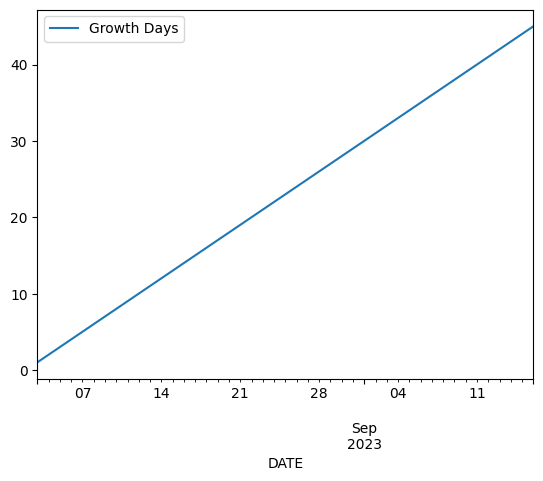

In [41]:
vis = pd.DataFrame(df['Growth Days'].iloc[:45])
vis.index.freq = 'D'
vis.plot()